In [1]:
from Bio import SeqIO
from Bio import Phylo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sequences = {}
for record in SeqIO.parse("res/sequences.fasta", "fasta"):
    sequences[record.id] = str(record.seq)
print(len(sequences))

529


In [3]:
subpopulations = {}
df = pd.read_csv("res/mapping.csv")
for index, row in df.iterrows():
    subpopulations[row["Cultivar ID"]] = row["Subpopulation"]


In [4]:
tree = Phylo.read("res/tree.nwk", "newick")

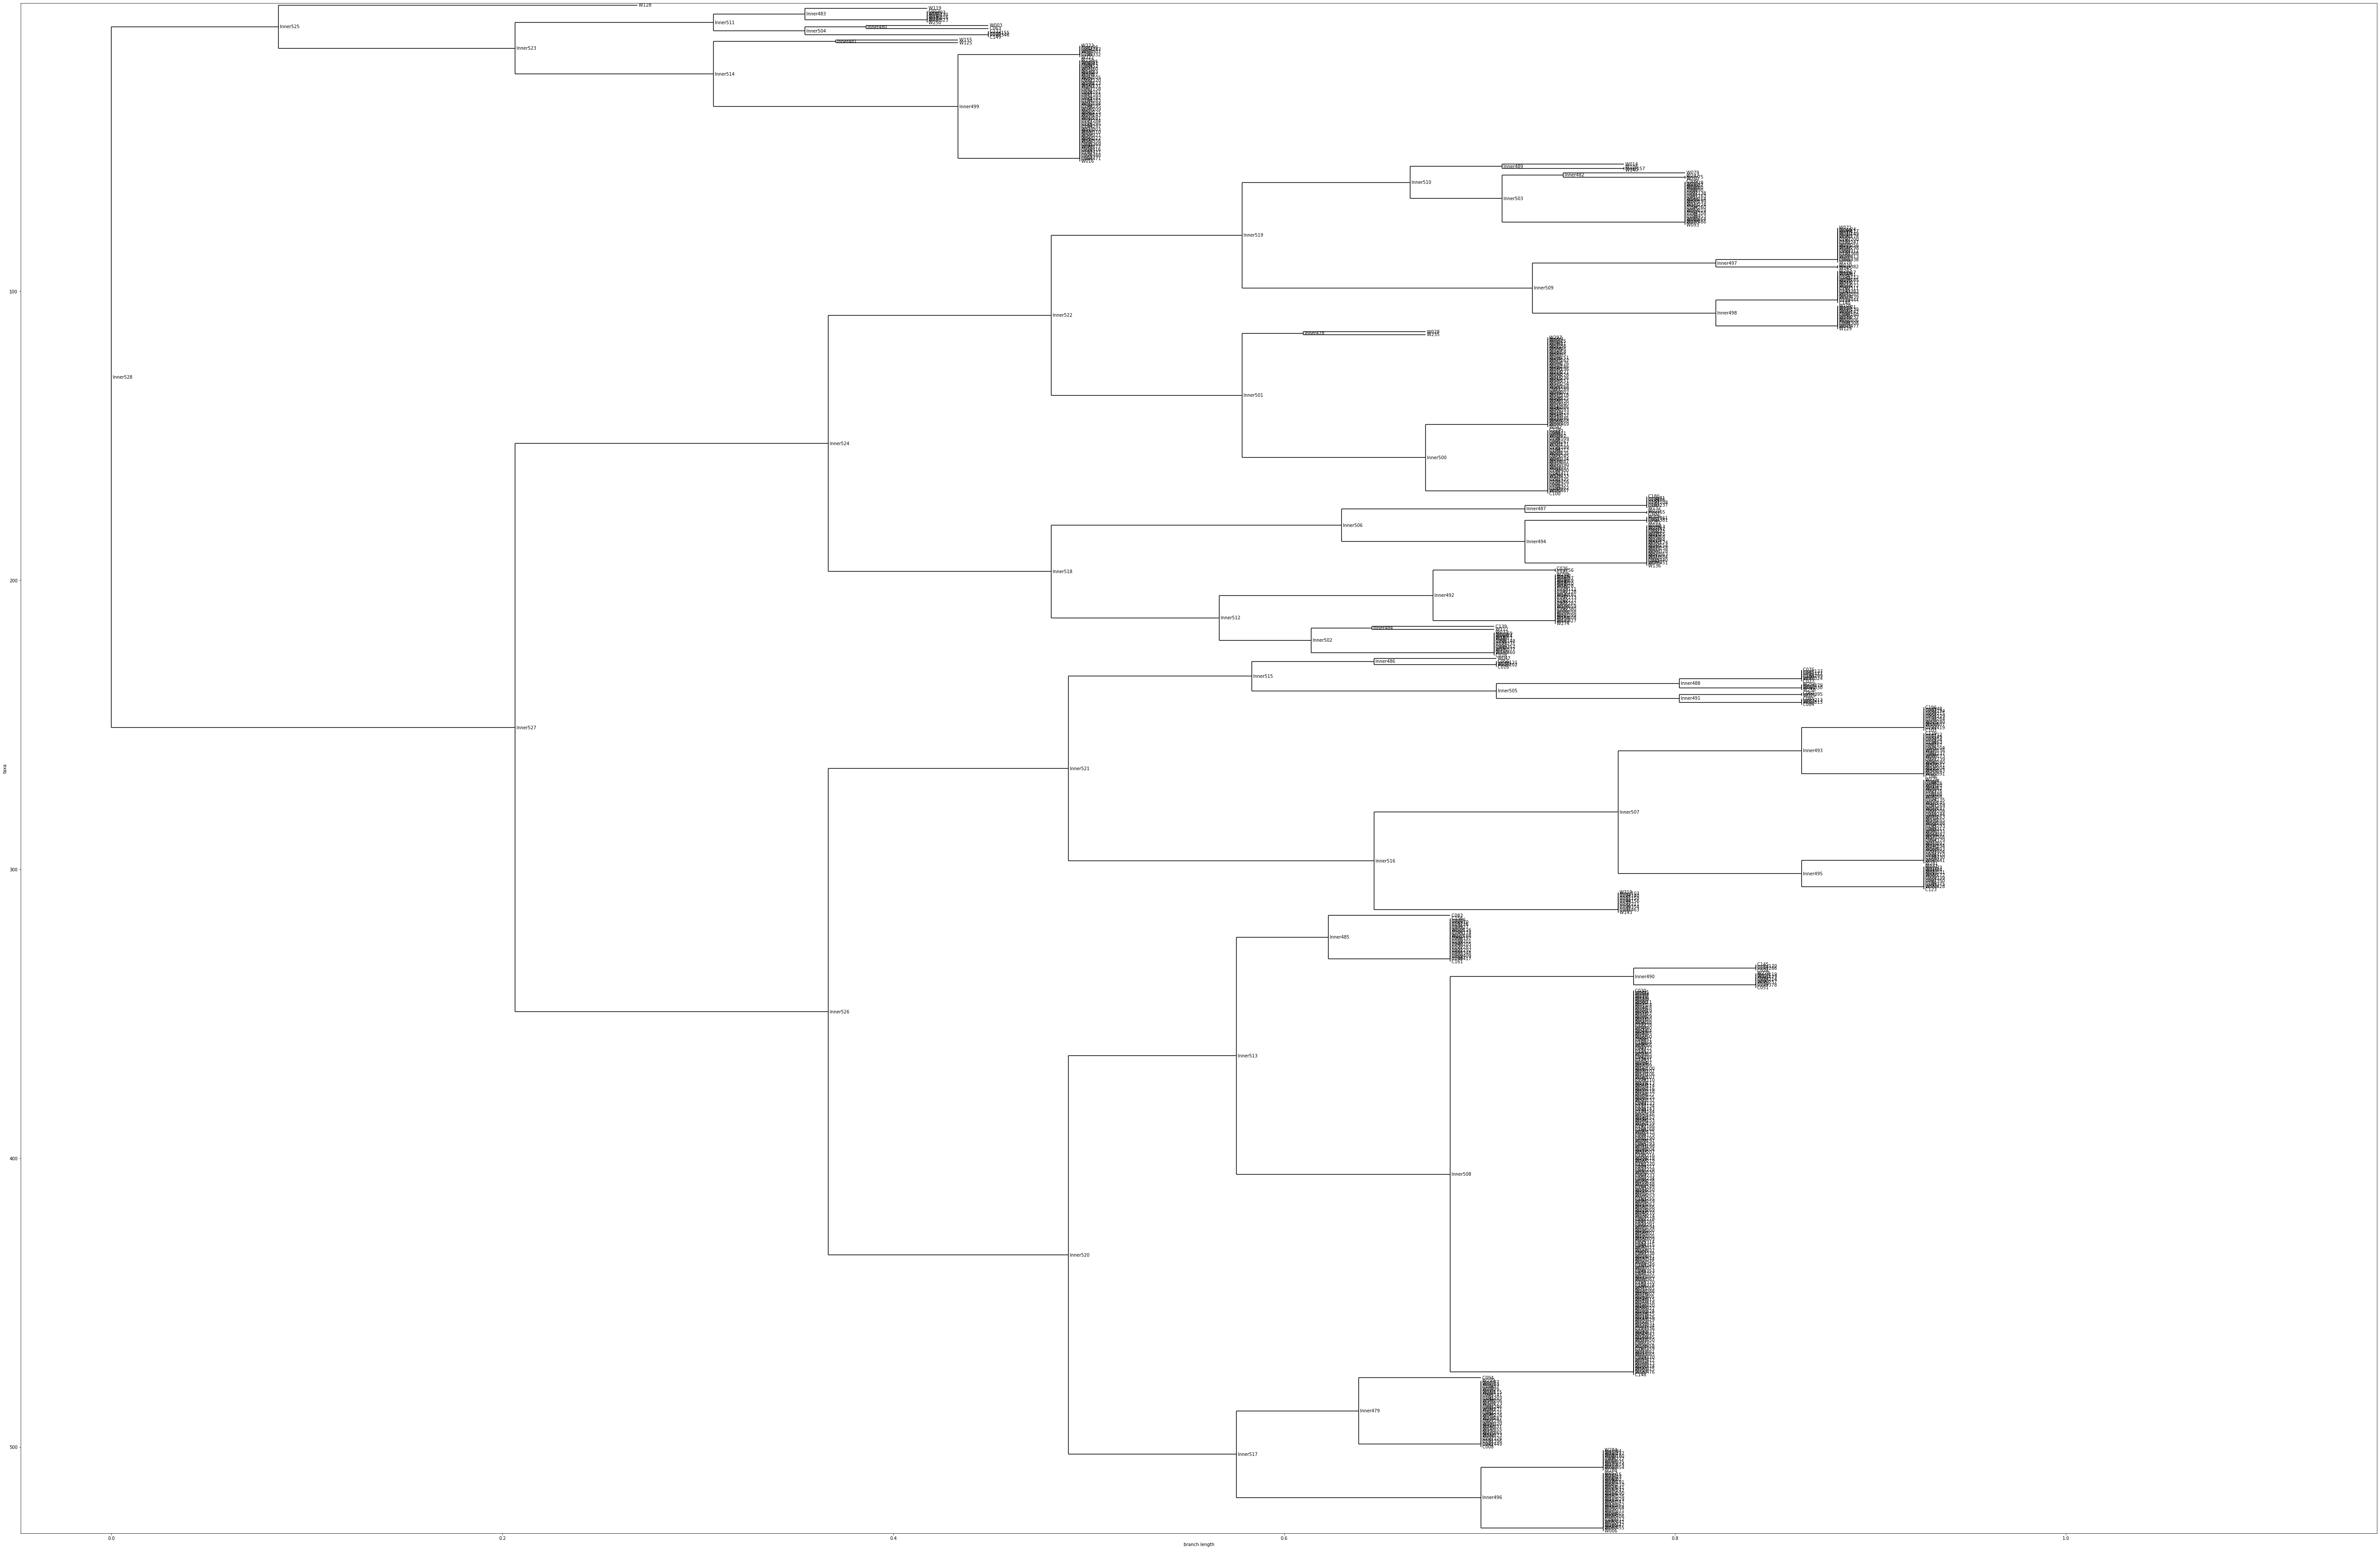

In [5]:
# Set the figure size
fig, ax = plt.subplots(figsize=(96, 64))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)

plt.show()

In [6]:
for clade in tree.find_clades():
    if not clade.is_terminal():
        seq_ids = [term.name for term in clade.get_terminals()]
        subpop_counts = {}
        for seq_id in seq_ids:
            subpop = subpopulations.get(seq_id, "")
            subpop_counts[subpop] = subpop_counts.get(subpop, 0) + 1
        if subpop_counts:
            max_count = max(subpop_counts.values())
            subpops = [k for k, v in subpop_counts.items() if v == max_count]
            if len(subpops) == 1:
                clade.name = subpops[0]

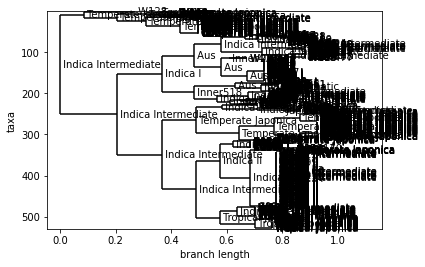

In [7]:
Phylo.draw(tree)

In [8]:
Phylo.draw_ascii(tree)

       ____________ W128
      |
      |                   ____ W119
      |                  |
      |                  |    , C012
      |                  |    |
      |                __|    | W060
      |               |  |    |
      |               |  |    | W193
      |               |  |    |
      |               |  |____| W249
      |         ______|       |
      |        |      |       | W250
      |        |      |
  ____|        |      |      ___ W003
 |    |        |      |   __|
 |    |        |      |  |  |___ C063
 |    |        |      |__|
 |    |        |         |      , C172
 |    |        |         |      |
 |    |        |         |______| C120
 |    |        |                |
 |    |        |                | C149
 |    |        |
 |    |        |           ____ W155
 |    |        |       ___|
 |    |        |      |   |____ W125
 |    |        |      |
 |    |        |      |            , W323
 |    |________|      |            |
 |             |      |    

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(96, 64))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)

plt.show()

In [ ]:
Phylo.write(tree, "annotated_tree.nwk", "newick")

In [ ]:
for clade in tree.find_clades():
    if clade.is_terminal():
        print(clade)

In [ ]:
str = "C134"
# Find the path from the root to the clade
path = tree.get_path(str)

In [ ]:
print(path[-2])

In [ ]:
clusters = []
for clade in tree.find_clades():
    if clade.is_preterminal():
        cluster = []
        nodes = clade.get_terminals()
        for node in nodes:
            cluster.append((node.name, sequences.get(node.name)))
        clusters.append(cluster)

for cluster in clusters:
    print()
    print(cluster)

In [ ]:
seq_map = {}
for clade in tree.find_clades():
    if clade.is_terminal():
        l = seq_map.get(sequences.get(clade.name))
        if l is None:
            l = []
        l.append(clade.name)
        seq_map[sequences.get(clade.name)] = l

In [ ]:
len(seq_map.keys())

In [ ]:
tree.get_path("W193")

# Clustering using phylogenetic tree

In [9]:
from Bio import Phylo

# Load the tree
tree = Phylo.read("res/tree.nwk", "newick")

# Get the tuple representation of the tree
def get_tuple(clade):
    if clade.is_terminal():
        return clade.name
    else:
        return (get_tuple(clade.clades[0]), get_tuple(clade.clades[1]))

tree_tuple = get_tuple(tree.clade)

print(tree_tuple)


(('W128', ((('W119', (((('C012', 'W060'), 'W193'), 'W249'), 'W250')), (('W003', 'C063'), (('C172', 'C120'), 'C149'))), (('W155', 'W125'), ((((('W323', 'C052'), 'W021'), 'C185'), 'W327'), ((((((((((((((((((((((((((((((((((('W158', 'W027'), 'C048'), 'W010'), 'W130'), 'W328'), 'W052'), 'C032'), 'W109'), 'W160'), 'C057'), 'C028'), 'C017'), 'C029'), 'C150'), 'W012'), 'C146'), 'W283'), 'W063'), 'W209'), 'W013'), 'C177'), 'C116'), 'C154'), 'W117'), 'W207'), 'W305'), 'W061'), 'W162'), 'C035'), 'W088'), 'C018'), 'C152'), 'C026'), 'C064'), 'W016'))))), (((((('W014', ('W106', 'W140')), (('W079', ('W247', 'W210')), ((((((((((((((('C109', 'W241'), 'W009'), 'C080'), 'C097'), 'C047'), 'W066'), 'W023'), 'W111'), 'C104'), 'W054'), 'C194'), 'C108'), 'W089'), 'W203'), 'W093'))), (((((((((((((('W071', 'W204'), 'W310'), 'W080'), 'C197'), 'C132'), 'W221'), 'W146'), 'C090'), 'C102'), 'W205'), 'C055'), 'W178'), ('W030', 'W145')), (((((((((((('W282', 'W144'), 'C125'), 'W198'), 'W314'), 'W114'), 'C182'), 'C143'

In [10]:
# clustering

fin=[]
s=str(tree_tuple)
leng = len(s)
for i in range(leng-1):
  if(i>0):
    i=k
  if i>=leng-1:
    break
  c1=0
  c2=0
  if s[i]== '(':
      c1+=1
  flag=0
  for j in range(i+1,leng):
    if s[j]!= '(' and s[j]!= ')' and s[j]!= ',' and s[j]!= " ":
      flag+=1
    elif s[j]== ')':
      if c1==0 and flag>5:
        strr=s[j-6:j]
        fin.append(strr)
        k=j+1
        break
      elif c1==0:
        k=j+1
        break
      else:
        c2+=1
        if c1==c2:
          strr1=s[i+c1:j]
          fin.append(strr1)
          k=j+1
          break
    else:
      if s[j]== '(' and flag>5 and c1-c2>=1:
        strr2=s[i+(c1-c2):j]
        fin.append(strr2)
        k=j
        break
      elif s[j]== '(' and flag>5:
        c1=1
        strr3=s[j-8:j-1]
        fin.append(strr3)
        k=j
        break
      else:
        if s[j]== '(':
          c1+=1
        else:
          continue
for i in range(len(fin)):
  fin[i] = fin[i].replace("(", "").replace(")", "").replace(",", "").replace("'", "")
cll=[]
for i in range(len(fin)):
  w=fin[i].split()
  res=",".join(w)
  w1=res.split(",")
  cll.append(w1)
cll


[['W128'],
 ['W119'],
 ['C012', 'W060', 'W193', 'W249', 'W250'],
 ['W003', 'C063'],
 ['C172', 'C120', 'C149'],
 ['W155', 'W125'],
 ['W323', 'C052', 'W021', 'C185', 'W327'],
 ['W158',
  'W027',
  'C048',
  'W010',
  'W130',
  'W328',
  'W052',
  'C032',
  'W109',
  'W160',
  'C057',
  'C028',
  'C017',
  'C029',
  'C150',
  'W012',
  'C146',
  'W283',
  'W063',
  'W209',
  'W013',
  'C177',
  'C116',
  'C154',
  'W117',
  'W207',
  'W305',
  'W061',
  'W162',
  'C035',
  'W088',
  'C018',
  'C152',
  'C026',
  'C064',
  'W016'],
 ['W014'],
 ['W106', 'W140'],
 ['W079'],
 ['W247', 'W210'],
 ['C109',
  'W241',
  'W009',
  'C080',
  'C097',
  'C047',
  'W066',
  'W023',
  'W111',
  'C104',
  'W054',
  'C194',
  'C108',
  'W089',
  'W203',
  'W093'],
 ['W071',
  'W204',
  'W310',
  'W080',
  'C197',
  'C132',
  'W221',
  'W146',
  'C090',
  'C102',
  'W205',
  'C055',
  'W178'],
 ['W030', 'W145'],
 ['W282',
  'W144',
  'C125',
  'W198',
  'W314',
  'W114',
  'C182',
  'C143',
  'W212',
  'W0

In [11]:
print(len(cll))

48


In [12]:
def cluster(stack):
    temp=""
    for i in stack:
        if(i=="(" or i==")"):
            pass
        else:
            temp+=i
    return temp

def dnd_to_clusters(s):
    s=str(s)
    s=s.replace(" ","")
    s=s.replace("'","")
    stack=[]
    final=[]
    previous_char=None
    i=0
    count_close=0
    count_open=0
    while(i!=len(s)):
        if((((s[i]=="(" and previous_char=='(') or (s[i]=="(" and previous_char==')')) and s[i-1]!=previous_char) or (count_close==count_open and count_close!=0)):
            stack.append(s[i])
            final.append(cluster(stack))
            stack=[]
            count_open=0
            count_close=0

        if(s[i]=='(' or s[i]==")"):
            if not (len(stack)==0 and s[i]==")"):
                previous_char=s[i]
                if(s[i]=="("):
                    count_open+=1
                else:
                    count_close+=1
        if(not(len(stack)==0 and s[i]==")")):
            stack.append(s[i])
        i=i+1
    lst=[]
    for i in final:
        if(len(i)==1):
            pass
        else:
            lst.append([ t for t in i.split(",") if len(t)!=0])
    return lst

In [13]:
final=dnd_to_clusters(tree_tuple)

In [14]:
final

[['W128'],
 ['W119'],
 ['C012', 'W060', 'W193', 'W249', 'W250'],
 ['W003', 'C063'],
 ['C172', 'C120', 'C149'],
 ['W155', 'W125'],
 ['W323', 'C052', 'W021', 'C185', 'W327'],
 ['W158',
  'W027',
  'C048',
  'W010',
  'W130',
  'W328',
  'W052',
  'C032',
  'W109',
  'W160',
  'C057',
  'C028',
  'C017',
  'C029',
  'C150',
  'W012',
  'C146',
  'W283',
  'W063',
  'W209',
  'W013',
  'C177',
  'C116',
  'C154',
  'W117',
  'W207',
  'W305',
  'W061',
  'W162',
  'C035',
  'W088',
  'C018',
  'C152',
  'C026',
  'C064',
  'W016'],
 ['W014'],
 ['W106', 'W140'],
 ['W079'],
 ['W247', 'W210'],
 ['C109',
  'W241',
  'W009',
  'C080',
  'C097',
  'C047',
  'W066',
  'W023',
  'W111',
  'C104',
  'W054',
  'C194',
  'C108',
  'W089',
  'W203',
  'W093'],
 ['W071',
  'W204',
  'W310',
  'W080',
  'C197',
  'C132',
  'W221',
  'W146',
  'C090',
  'C102',
  'W205',
  'C055',
  'W178'],
 ['W030', 'W145'],
 ['W282',
  'W144',
  'C125',
  'W198',
  'W314',
  'W114',
  'C182',
  'C143',
  'W212',
  'W0

In [15]:
len(final)

48

In [16]:
df_clu=pd.DataFrame(cll).stack()

In [17]:
df_clu

0   0     W128
1   0     W119
2   0     C012
    1     W060
    2     W193
          ... 
47  16    C153
    17    W053
    18    W285
    19    W067
    20    W006
Length: 529, dtype: object